# Prophet model from facebook to be used in time series analysis

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("../00_datasets/DailyClimateTrain.csv", index_col="date", parse_dates=True)
print(df.head())
print('-------------------------------------------')
df.info()

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [3]:
# # import the dataset
# df = pd.read_csv("../00_datasets/DailyClimateTest.csv", index_col="date", parse_dates=True)
# print(df.head())
# print('-------------------------------------------')
# print(df.info())

In [4]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

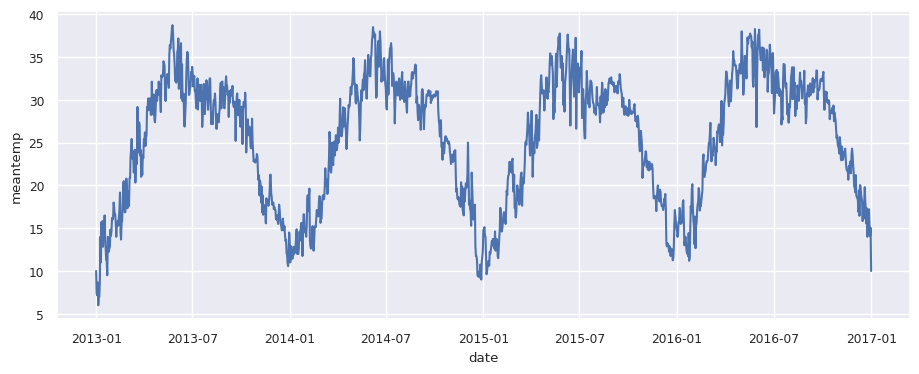

In [5]:
# change sns figsize and grid
sns.set_theme(rc={'figure.figsize':(11, 4)}, style='darkgrid', font_scale=0.8)
# draw a line plot
sns.lineplot(data=df, x="date", y="meantemp")
# sns.lineplot(data=df, x="date", y="humidity")
# sns.lineplot(data=df, x="date", y="wind_speed")
# sns.lineplot(data=df, x="date", y="meanpressure")

In [6]:
# draw same plot on plotly
# fig = px.line(df, x=df.index, y="meantemp", title='Mean Temperature')
fig = px.line(df, x=df.index, y="meanpressure", title='Mean Pressure')
fig.show()

/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [7]:
# # take averege of 27 and 29 and replace 28 march 2016 value for meanpressure
# df.loc["2016-03-28", "meanpressure"] = np.mean([df.loc["2016-03-27", "meanpressure"], df.loc["2016-03-29", "meanpressure"]])

# interpolate the outlier of 28 march 2016
df.loc["2016-03-28", "meanpressure"] = np.nan
# interpolate the missing value
df["meanpressure"] = df["meanpressure"].interpolate(method='linear') # linear interpolation means: returned value is the mean of the previous and next values
df.loc['2016-03-28']


meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [8]:
df.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1006.544171
std,7.348103,16.769652,4.561602,45.031339
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.921875
max,38.714286,100.000000,42.220000,1352.615385


In [9]:
# make a scatter plot b/w meanteamp and humidity
fig = px.scatter(df, x="meantemp", y="humidity", title='Mean Temperature vs Humidity',
                 trendline="ols", trendline_color_override="red")
fig.show()

In [10]:
# check prerson correlation between meantemp and humidity
corr = df[['meantemp', 'humidity']].corr(method='pearson')
print(f'Pearson correlation between meantemp and humidity:\n{corr.iloc[0, 1]:.3f}')
print('-------------------------------------------')
print(corr)

# from scipy.stats import pearsonr
# corr, _ = pearsonr(df['meantemp'], df['humidity'])
# print('Pearsons correlation: %.3f' % corr)


Pearson correlation between meantemp and humidity:
-0.572
-------------------------------------------
          meantemp  humidity
meantemp  1.000000 -0.571951
humidity -0.571951  1.000000


<Axes: >

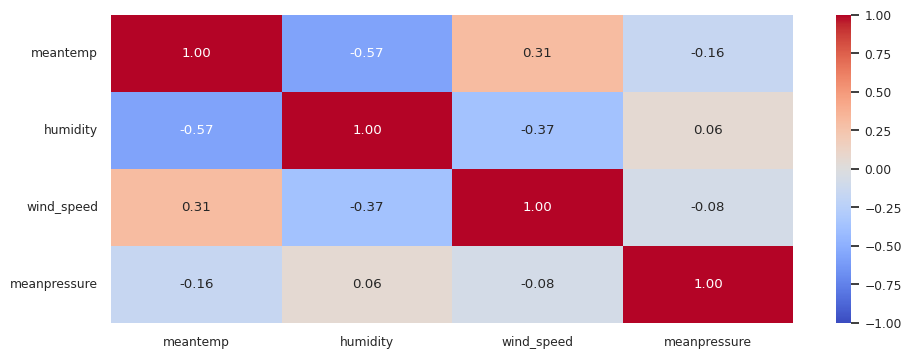

In [11]:
# plot correlation heatmap using sns
# plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)


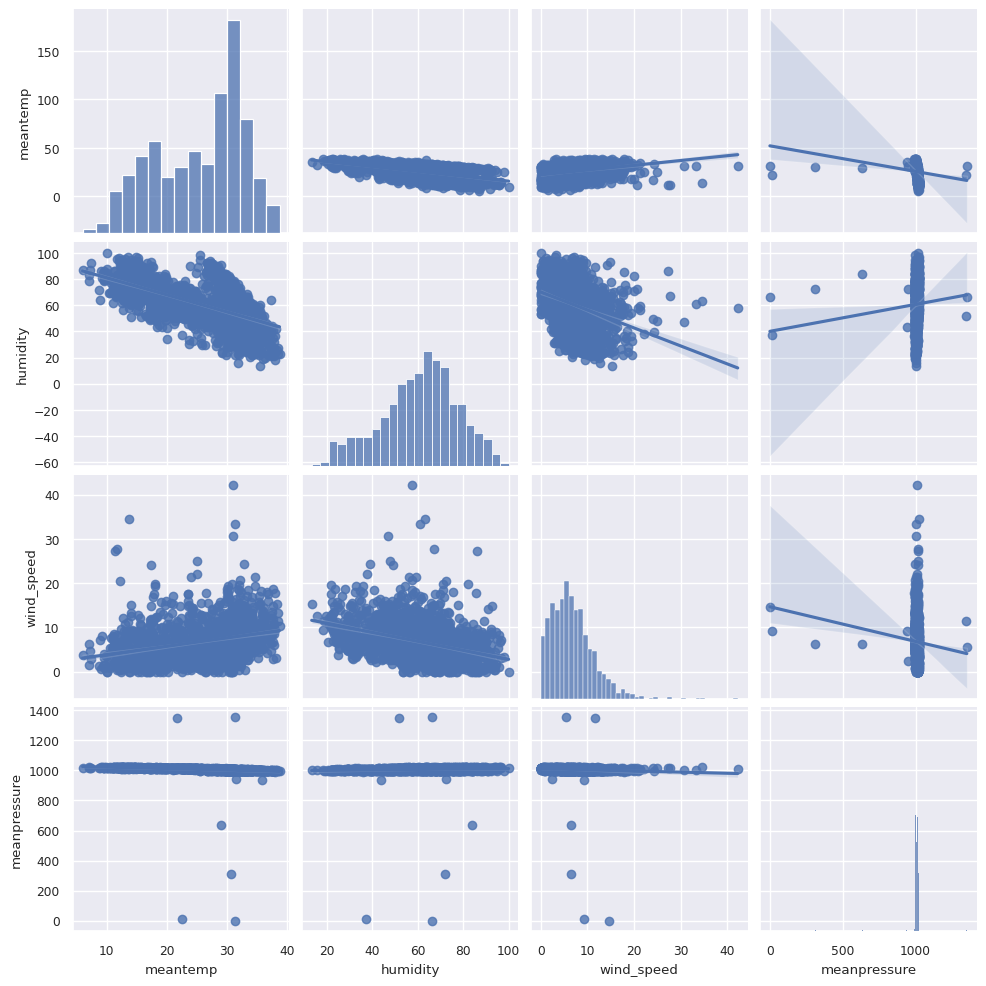

In [12]:
# draw pair plot
# sns.pairplot(df, vars=['meantemp', 'humidity', 'wind_speed', 'meanpressure'], diag_kind='kde',
#              plot_kws={'alpha': 0.5, 's': 10, 'edgecolor': 'k'}, height=2.5)

sns.pairplot(df, kind='reg') # kind: kde, reg, scatter, hist

In [13]:
# lets scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-1.927019e-15
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-2.242730e+01
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-1.102679e-01
50%,3.020541e-01,1.105528e-01,-1.273107e-01,4.485792e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,1.861053e-01
max,1.799551e+00,2.340044e+00,7.766988e+00,7.687749e+00


<Axes: >

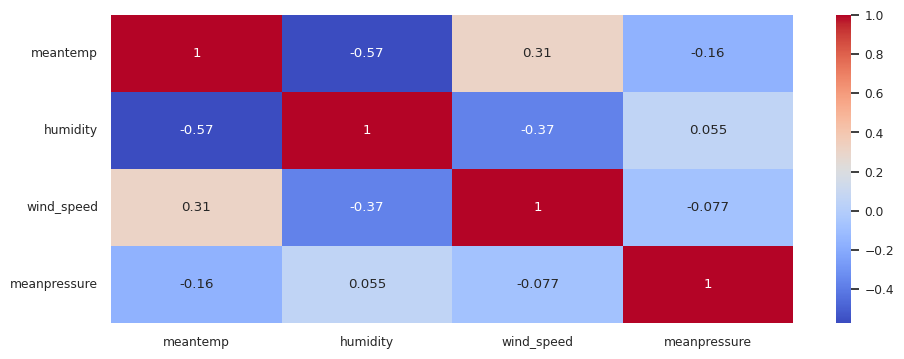

In [14]:
# make a correlation heatmap of scaled data
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm') # we wont see any change in correlation


<Axes: xlabel='date', ylabel='meantemp'>

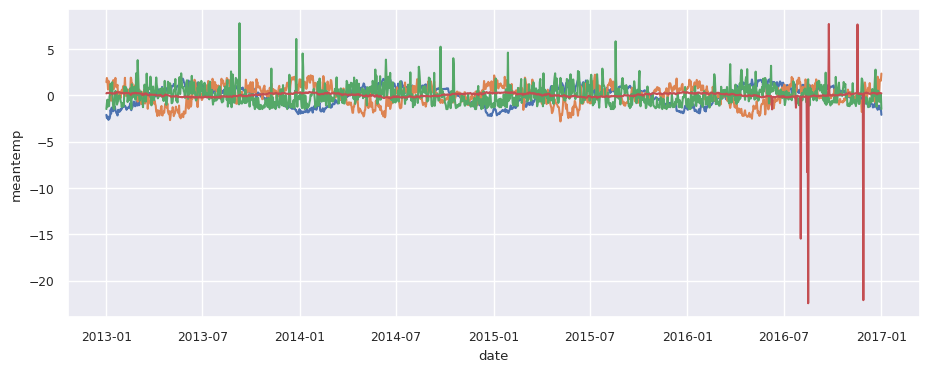

In [17]:
# draw a line plot
sns.set_theme(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
sns.lineplot(data=df_scaled, x="date", y="meanpressure")

In [18]:
# add two columns in the dataset for month an year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year

df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.202650,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.250041,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.269293,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.235972,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.221162,1,2013


In [19]:
print(df_scaled['month'].unique())
print(df_scaled.year.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2013 2014 2015 2016 2017]


(1.0, 12.0)

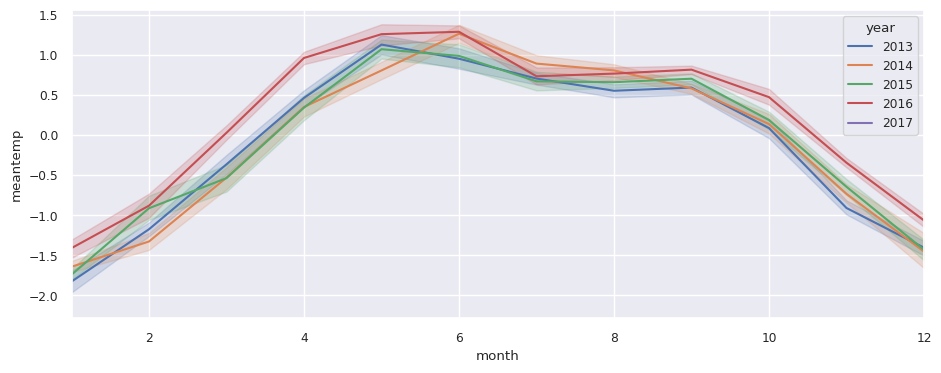

In [20]:
# draw a line plot for each month
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue="year", palette='deep')
plt.xlim(1, 12)

In [21]:
# same in plotly
fig = px.line(df_scaled, x=df_scaled.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

In [22]:
# add two columns in the dataset for month an year
df['month'] = df.index.month
df['year'] = df.index.year

# plot a line plot for each month
fig = px.line(df, x=df.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

# df.head()

# lets use the prophet model from python

In [23]:
df = pd.read_csv("../00_datasets/DailyClimateTrain.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [24]:
# rename the columns
df = df.rename(columns={'date':'ds', 'meantemp': 'y'}) # prophet model take date as ds and target variable as y
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# print length of dates with year 2013
print(len(df[df['ds'].str.contains('2013')])) # 1 year contains 365 enteries. means: we have 1 record for each day

365


In [ ]:
# pip install prophet

In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# call the model
model = Prophet()
model.fit(df)

forecast = model.make_future_dataframe(periods=365)  # make future dataframe for 365 days
prediction = model.predict(forecast)
# plot the prediction
plot_plotly(model, prediction)

/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmpyqztxvg8/n_j2gitk.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmpyqztxvg8/rf9f448a.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21280', 'data', 'file=/tmp/tmpyqztxvg8/n_j2gitk.json', 'init=/tmp/tmpyqztxvg8/rf9f448a.json', 'output', 'file=/tmp/tmpyq

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.690074,8.891198,14.261311,24.690074,24.690074,-12.939149,-12.939149,-12.939149,0.034028,0.034028,0.034028,-12.973177,-12.973177,-12.973177,0.0,0.0,0.0,11.750925
1,2013-01-02,24.690237,9.287284,14.658786,24.690237,24.690237,-12.803787,-12.803787,-12.803787,0.146257,0.146257,0.146257,-12.950044,-12.950044,-12.950044,0.0,0.0,0.0,11.886450
2,2013-01-03,24.690400,9.373134,14.402692,24.690400,24.690400,-12.844518,-12.844518,-12.844518,0.067150,0.067150,0.067150,-12.911668,-12.911668,-12.911668,0.0,0.0,0.0,11.845882
3,2013-01-04,24.690563,9.241357,14.203196,24.690563,24.690563,-12.832462,-12.832462,-12.832462,0.027528,0.027528,0.027528,-12.859990,-12.859990,-12.859990,0.0,0.0,0.0,11.858100
4,2013-01-05,24.690725,9.339416,14.424247,24.690725,24.690725,-12.866125,-12.866125,-12.866125,-0.069127,-0.069127,-0.069127,-12.796998,-12.796998,-12.796998,0.0,0.0,0.0,11.824600


In [27]:
df.shape, prediction.shape # 1462 + 365 = 1827

((1462, 5), (1827, 19))

In [30]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = df['y']
y_pred = prediction['yhat'][:len(y_true)]

mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))

Mean Squared Error: 4.12
MAE:  1.5988858825692633
RMSE:  2.03077376741205


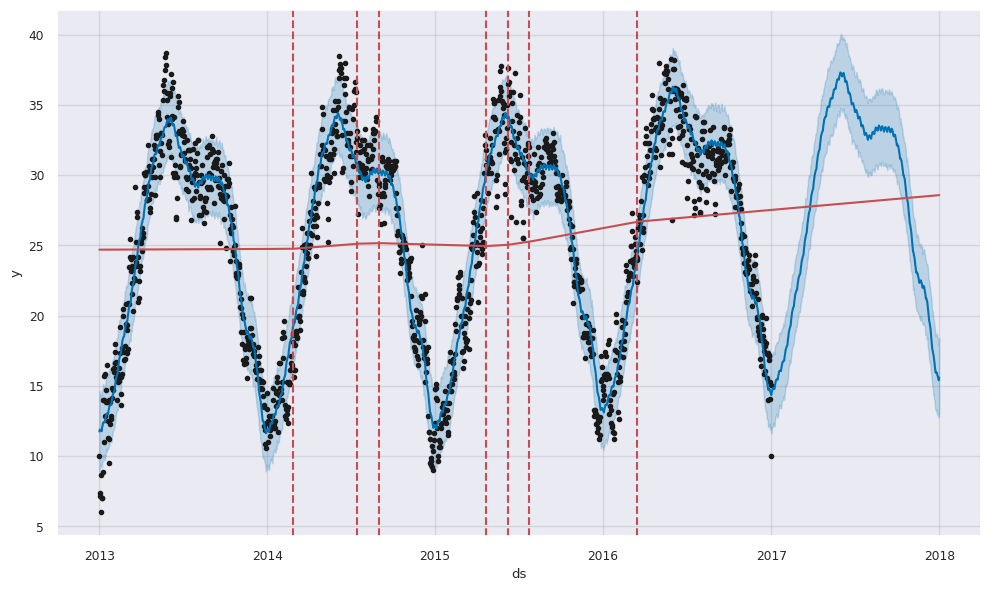

In [31]:
from prophet.plot import add_changepoints_to_plot

# plot model fitness on training data set and validation data set
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)


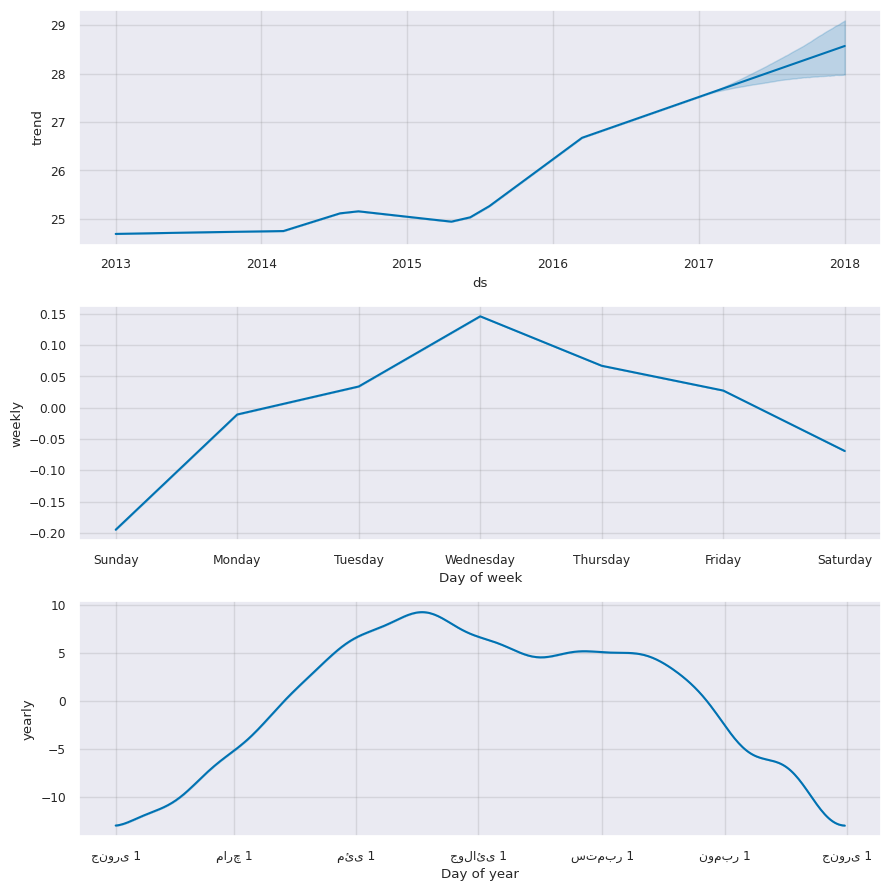

In [32]:
# plot model components
fig = model.plot_components(prediction)

INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmpyqztxvg8/9n3tvrw9.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmpyqztxvg8/4ohcrduv.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90687', 'data', 'file=/tmp/tmpyqztxvg8/9n3tvrw9.json', 'init=/tmp/tmpyqztxvg8/4ohcrduv.json', 'output', 'file=/tmp/tmpyqztxvg8/prophet_modelzspbmkdp/prophet_model-20250930193032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:30:32 - cmdstanpy - INFO - Chain [1] start processing
INFO	cmdstanpy:model.py:_run_cmdstan()- Chain [1] start proc

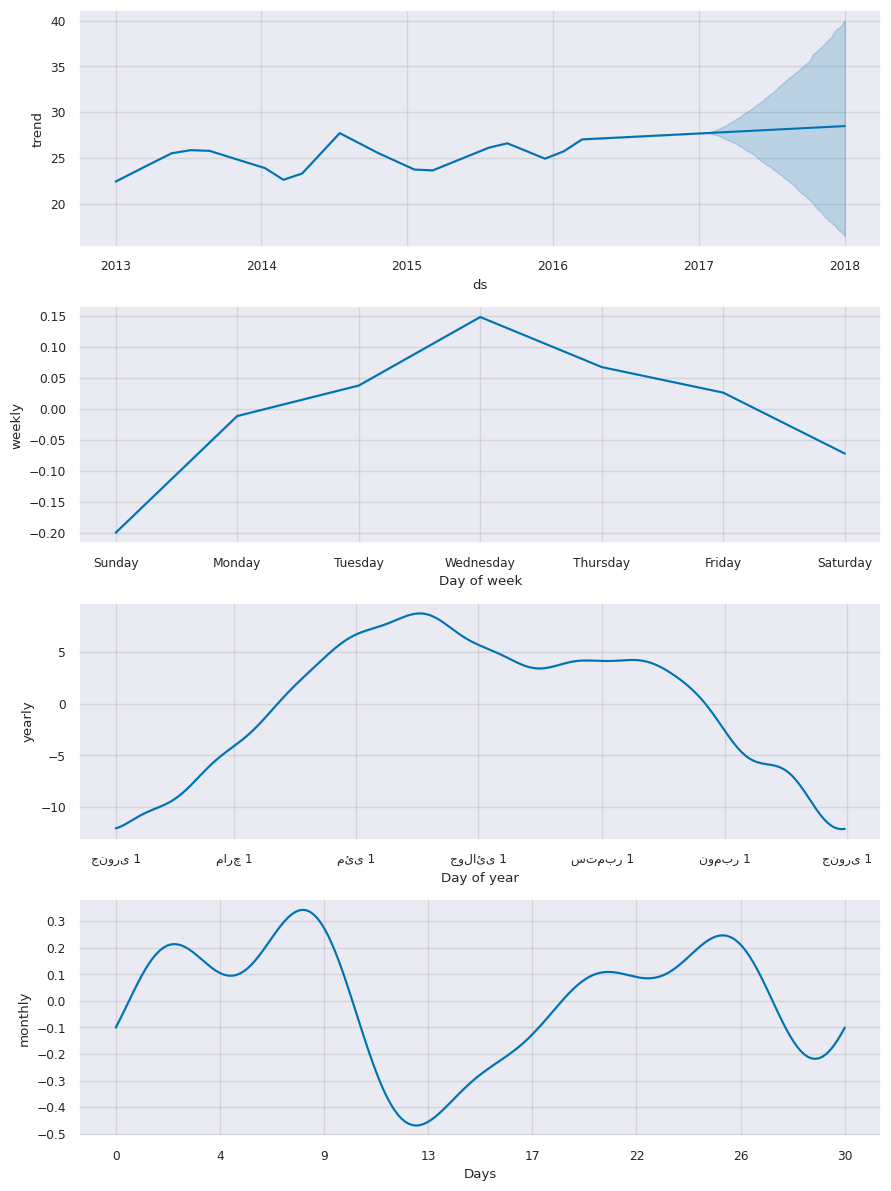

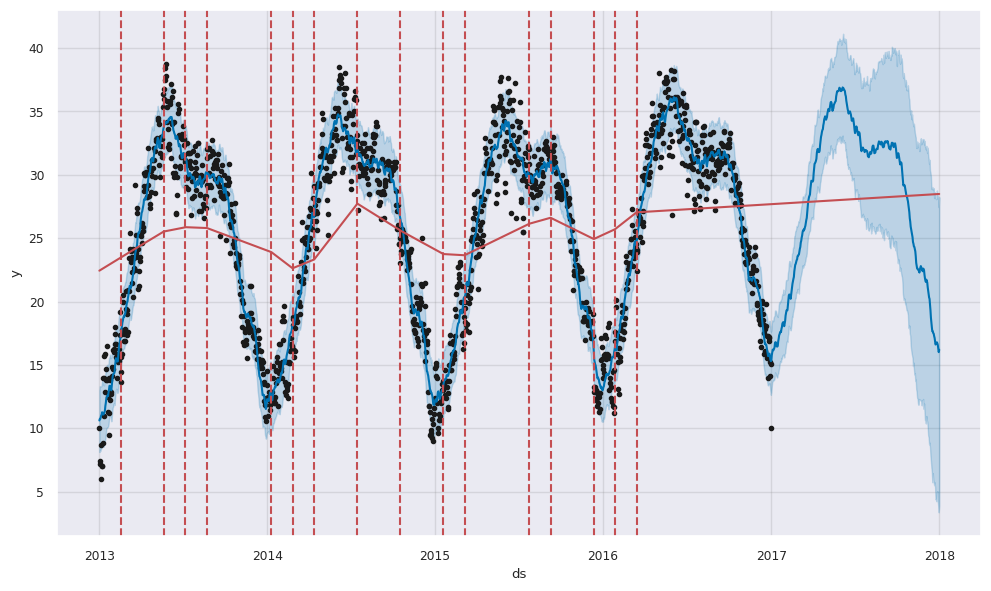

In [33]:
# model more components
model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.1, holidays_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
fig = model.plot_components(forecast)

# plot model fitness on training data set and validation data set
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


# # interpret the output
# from prophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
# df_cv.head()